In [14]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from dataset import load_hoda

In [15]:
x_train_orginal , y_train_orginal , x_test_orginal , y_test_orginal = load_hoda()

In [16]:
y_train = keras.utils.to_categorical(y_train_orginal , num_classes=10)
y_test = keras.utils.to_categorical(y_test_orginal, num_classes=10)

In [17]:
x_train = x_train_orginal.astype('float32')
x_test = x_test_orginal.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
model = Sequential()
model.add(Dense(64 , activation='relu' , input_dim = 25))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1664      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [21]:
history = model.fit(x_train, y_train, batch_size=64,epochs=100, validation_split= .2)

Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 2.2440 - accuracy: 0.1500 - val_loss: 2.0860 - val_accuracy: 0.3600
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 2.0266 - accuracy: 0.3750 - val_loss: 1.9136 - val_accuracy: 0.5300
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1.8643 - accuracy: 0.5512 - val_loss: 1.7615 - val_accuracy: 0.6650
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 1.7107 - accuracy: 0.6550 - val_loss: 1.6156 - val_accuracy: 0.7150
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 1.5642 - accuracy: 0.7113 - val_loss: 1.4786 - val_accuracy: 0.7550
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 1.4242 - accuracy: 0.7563 - val_loss: 1.3488 - val_accuracy: 0.7700
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 1.2914 - accuracy: 0.7750 - val_loss: 1.2264 - val_accuracy: 0.7800
Epoch 8/100


Text(0, 0.5, 'Accuracy')

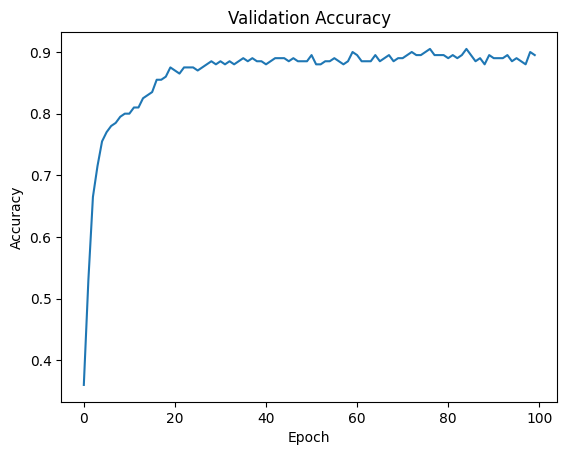

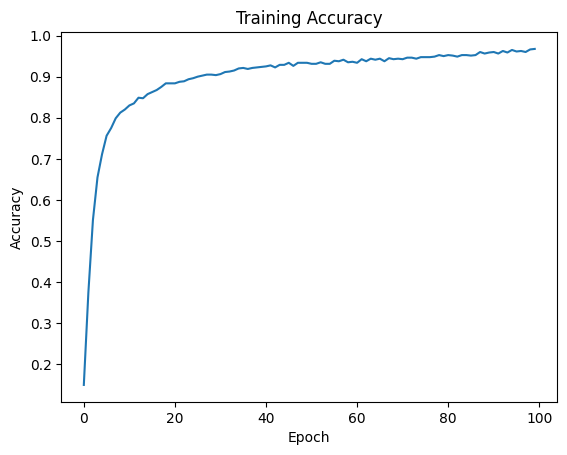

In [26]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.figure(2) 
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [27]:
loss , acc = model.evaluate(x_test, y_test)
print(f'testing loss : {loss} and testing accuary :{acc}')

7/7 [==============================] - 0s 13ms/step - loss: 0.2717 - accuracy: 0.9100
testing loss : 0.2717253267765045 and testing accuary :0.9100000262260437
